In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.datasets import mnist

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [3]:
def load_data():
    print('Loading data...')
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    X_train /= 255
    X_test /= 255

    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    print('Data loaded.')
    return [X_train, X_test, y_train, y_test]

In [4]:
def init_model():
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(300))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

In [9]:
def run_network(data=None, model=None, epochs=20, batch=256):
    try:
        start_time = time.time()
        if data is None:
            X_train, X_test, y_train, y_test = load_data()
        else:
            X_train, X_test, y_train, y_test = data

        if model is None:
            model = init_model()

        history = LossHistory()

        print('Training model...')
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch,
                  callbacks=[history],
                  validation_data=(X_test, y_test), verbose=2)

        print("Training duration : {0}".format(time.time() - start_time))
        score = model.evaluate(X_test, y_test, batch_size=16)

        print("Network's test score [loss, accuracy]: {0}".format(score))
        return model, history.losses
    except KeyboardInterrupt:
        print(' KeyboardInterrupt')
        return model, history.losses

In [13]:
def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')

In [7]:
data = load_data()

Loading data...
11493376/11490434 [==============================] - 22s 2us/step
Data loaded.


In [11]:
model, losses = run_network(data=data)

Compiling Model ... 
Model compield in 0.14789247512817383 seconds
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.3608 - acc: 0.8885 - val_loss: 0.1337 - val_acc: 0.9579
Epoch 2/20
 - 11s - loss: 0.1570 - acc: 0.9528 - val_loss: 0.1041 - val_acc: 0.9685
Epoch 3/20
 - 7s - loss: 0.1140 - acc: 0.9653 - val_loss: 0.0881 - val_acc: 0.9721
Epoch 4/20
 - 7s - loss: 0.0926 - acc: 0.9719 - val_loss: 0.0784 - val_acc: 0.9763
Epoch 5/20
 - 7s - loss: 0.0772 - acc: 0.9766 - val_loss: 0.0710 - val_acc: 0.9808
Epoch 6/20
 - 7s - loss: 0.0694 - acc: 0.9790 - val_loss: 0.0789 - val_acc: 0.9770
Epoch 7/20
 - 7s - loss: 0.0623 - acc: 0.9816 - val_loss: 0.0699 - val_acc: 0.9802
Epoch 8/20
 - 7s - loss: 0.0582 - acc: 0.9825 - val_loss: 0.0725 - val_acc: 0.9813
Epoch 9/20
 - 7s - loss: 0.0536 - acc: 0.9836 - val_loss: 0.0736 - val_acc: 0.9801
Epoch 10/20
 - 7s - loss: 0.0490 - acc: 0.9855 - val_loss: 0.0727 - val_acc: 0.9814
Epoch 11/20
 - 7s - loss: 0.0489 

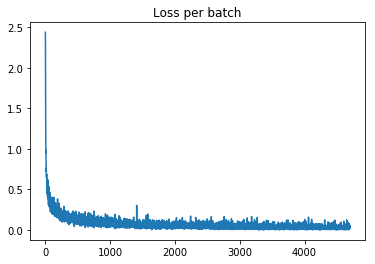

In [14]:
plot_losses(losses)

Compiling Model ... 
Model compield in 0.14844536781311035 seconds
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 10s - loss: 0.3570 - acc: 0.8900 - val_loss: 0.1437 - val_acc: 0.9550
Epoch 2/30
 - 11s - loss: 0.1512 - acc: 0.9543 - val_loss: 0.1004 - val_acc: 0.9684
Epoch 3/30
 - 10s - loss: 0.1137 - acc: 0.9649 - val_loss: 0.0785 - val_acc: 0.9770
Epoch 4/30
 - 11s - loss: 0.0931 - acc: 0.9714 - val_loss: 0.0782 - val_acc: 0.9765
Epoch 5/30
 - 8s - loss: 0.0816 - acc: 0.9750 - val_loss: 0.0699 - val_acc: 0.9787
Epoch 6/30
 - 8s - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0691 - val_acc: 0.9803
Epoch 7/30
 - 8s - loss: 0.0655 - acc: 0.9803 - val_loss: 0.0667 - val_acc: 0.9814
Epoch 8/30
 - 7s - loss: 0.0580 - acc: 0.9820 - val_loss: 0.0664 - val_acc: 0.9828
Epoch 9/30
 - 7s - loss: 0.0560 - acc: 0.9827 - val_loss: 0.0694 - val_acc: 0.9828
Epoch 10/30
 - 7s - loss: 0.0504 - acc: 0.9844 - val_loss: 0.0655 - val_acc: 0.9828
Epoch 11/30
 - 7s - loss: 0.04

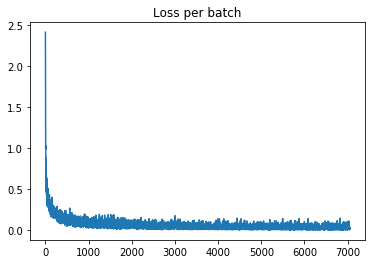

In [15]:
model, losses = run_network(data=data, epochs=30)
plot_losses(losses)

Compiling Model ... 
Model compield in 0.1518268585205078 seconds
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.4374 - acc: 0.8654 - val_loss: 0.1904 - val_acc: 0.9439
Epoch 2/30
 - 5s - loss: 0.1804 - acc: 0.9461 - val_loss: 0.1456 - val_acc: 0.9521
Epoch 3/30
 - 8s - loss: 0.1285 - acc: 0.9612 - val_loss: 0.0985 - val_acc: 0.9680
Epoch 4/30
 - 9s - loss: 0.1011 - acc: 0.9694 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 5/30
 - 7s - loss: 0.0850 - acc: 0.9740 - val_loss: 0.0784 - val_acc: 0.9769
Epoch 6/30
 - 7s - loss: 0.0731 - acc: 0.9775 - val_loss: 0.0670 - val_acc: 0.9782
Epoch 7/30
 - 7s - loss: 0.0647 - acc: 0.9801 - val_loss: 0.0632 - val_acc: 0.9804
Epoch 8/30
 - 7s - loss: 0.0585 - acc: 0.9812 - val_loss: 0.0669 - val_acc: 0.9815
Epoch 9/30
 - 7s - loss: 0.0525 - acc: 0.9833 - val_loss: 0.0764 - val_acc: 0.9779
Epoch 10/30
 - 6s - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0616 - val_acc: 0.9818
Epoch 11/30
 - 6s - loss: 0.0438 - 

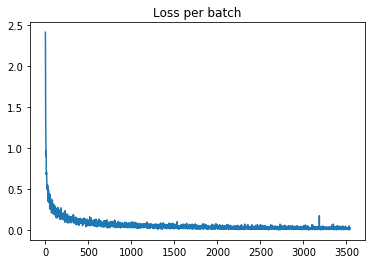

In [16]:
model, losses = run_network(data=data, epochs=30, batch=512)
plot_losses(losses)

Compiling Model ... 
Model compield in 0.14574050903320312 seconds
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 14s - loss: 0.3111 - acc: 0.9034 - val_loss: 0.1165 - val_acc: 0.9643
Epoch 2/30
 - 15s - loss: 0.1446 - acc: 0.9569 - val_loss: 0.0956 - val_acc: 0.9708
Epoch 3/30
 - 11s - loss: 0.1111 - acc: 0.9675 - val_loss: 0.0980 - val_acc: 0.9711
Epoch 4/30
 - 14s - loss: 0.0959 - acc: 0.9720 - val_loss: 0.0771 - val_acc: 0.9784
Epoch 5/30
 - 14s - loss: 0.0845 - acc: 0.9758 - val_loss: 0.0780 - val_acc: 0.9802
Epoch 6/30
 - 11s - loss: 0.0782 - acc: 0.9779 - val_loss: 0.0779 - val_acc: 0.9798
Epoch 7/30
 - 11s - loss: 0.0736 - acc: 0.9786 - val_loss: 0.0740 - val_acc: 0.9802
Epoch 8/30
 - 12s - loss: 0.0670 - acc: 0.9810 - val_loss: 0.0825 - val_acc: 0.9803
Epoch 9/30
 - 12s - loss: 0.0638 - acc: 0.9819 - val_loss: 0.0720 - val_acc: 0.9823
Epoch 10/30
 - 10s - loss: 0.0609 - acc: 0.9832 - val_loss: 0.0802 - val_acc: 0.9800
Epoch 11/30
 - 9s - loss

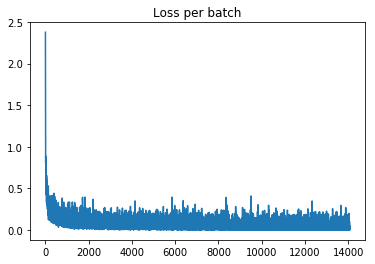

In [17]:
model, losses = run_network(data=data, epochs=30, batch=128)
plot_losses(losses)